# Simulations for NJ4 single-strain model

In [1]:
from cobra.io import read_sbml_model

nj4 = read_sbml_model("GEMs/NJ4_curated.xml")

## static modelling

- see if it is possible to replicate the three observed chemostat stages of C. acetobutylicum

In [2]:
medium = list(nj4.medium.keys())
essential_rx = []

for rx in medium:
    with nj4:
        nj4.reactions.get_by_id(rx).lower_bound = 0
        sol = nj4.slim_optimize()
        if sol < 1e-6:
            essential_rx.append(rx)

print('essential metabolites:' ,[rx[3:] for rx in essential_rx])

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


essential metabolites: ['ca2_e', 'cl_e', 'cobalt2_e', 'cu2_e', 'fe3_e', 'fol_e', 'k_e', 'mg2_e', 'mn2_e', 'pi_e', 'so4_e', 'ura_e', 'zn2_e']


In [3]:
full_media = nj4.medium

medium = {rx:0.1 for rx in full_media.keys()}
medium['EX_xyl__D_e'] = 10
for rx in essential_rx:
    medium[rx] = 10

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [4]:
with nj4:
    nj4.medium = medium
    summary = nj4.summary()
    solution = nj4.optimize()

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [74]:
summary

Metabolite,Reaction,Flux,C-Number,C-Flux
ala__L_e,EX_ala__L_e,0.1,3,0.52%
arg__L_e,EX_arg__L_e,0.1,6,1.04%
asp__L_e,EX_asp__L_e,0.1,4,0.69%
ca2_e,EX_ca2_e,0.001026,0,0.00%
cl_e,EX_cl_e,0.001026,0,0.00%
cobalt2_e,EX_cobalt2_e,1.972E-05,0,0.00%
cu2_e,EX_cu2_e,0.0001398,0,0.00%
cys__L_e,EX_cys__L_e,0.1,3,0.52%
fe2_e,EX_fe2_e,0.001324,0,0.00%
fe3_e,EX_fe3_e,0.00154,0,0.00%


- an amino acid conundrum, there are AAs present in the yeast-extract, but probably in really small amounts...
- is consuming xylose, however not as sole carbon-source due to AAs...
- is secreting ethanol, acetone, and butanol. which should be co-expressed in solventogenetic phase!

In [14]:
import escher
from escher import Builder

builder = Builder(map_json='new_map.json', model=nj4, height=600)

In [15]:
builder.reaction_data = solution.fluxes

In [16]:
builder

Builder(height=600, reaction_data={'12DGR120tipp': 0.0, '12DGR140tipp': 0.0, '12DGR160tipp': 0.052068902030944…

In [18]:
with nj4:
    nj4.medium = medium
    ac_summary = nj4.metabolites.ac_c.summary()

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [19]:
ac_summary

Percent,Flux,Reaction,Definition
100.00%,1.799,ACKr,ac_c + atp_c <=> actp_c + adp_c
Percent,Flux,Reaction,Definition
100.00%,-1.799,ACACCT,acac_c + accoa_c <=> aacoa_c + ac_c


## dynamic modelling

In [35]:
import pandas as pd

media_db = pd.read_csv("medium.tsv", sep="\t")

nj4_med = media_db[media_db["medium"] == "nj4_med"]

UNLIMITED_METABOLITES = ['ca2_e', 'cl_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e','h_e', 'k_e', 'h2o_e', 'mg2_e', 
                    'mn2_e', 'mobd_e', 'na1_e', 'nh4_e', 'ni2_e', 'pi_e', 'so4_e', 'zn2_e']

medium = [str(m+"_e") for m in nj4_med["compound"].tolist()]
added_metabilotes = set(medium) - set(UNLIMITED_METABOLITES)
added_metabilotes = {k:10 for k in added_metabilotes}
added_metabilotes["xyl__D_e"] = 20 # 20 mmol corresponds to 60 g/L xylose

In [36]:
from utils.comets_functions import single_strain

sim = single_strain(model=nj4, medium=added_metabilotes, sim_time=40)


Running COMETS simulation ...
Done!


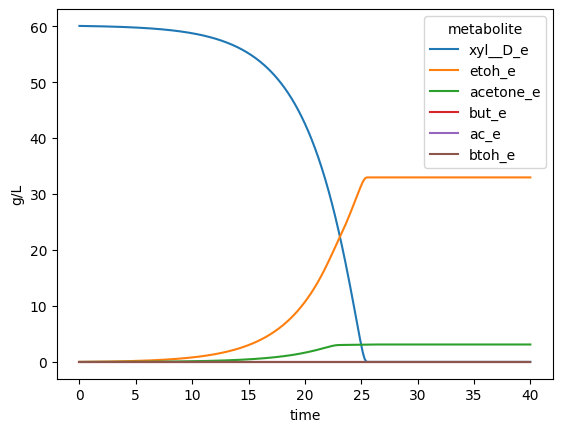

In [37]:
import seaborn as sns
from utils.comets_functions import plot_metabolites, plot_biomass

metabolites = ["xyl__D_e", "etoh_e", "but_e", "btoh_e", "ac_e", "acetone_e"]

plot_metabolites(sim, metabolites)

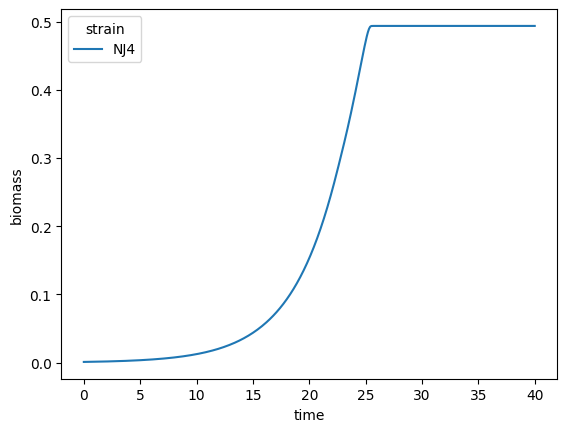

In [38]:
plot_biomass(sim)